0. Import library

In [31]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

1. Load data 

In [5]:
breed_data = pd.read_csv('./dog_data/labels.csv')
train = "./dog_data/train/"
test="./dog_data/test/"

In [8]:
breed_data.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


In [7]:
#Number of different breed type
breed_data.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

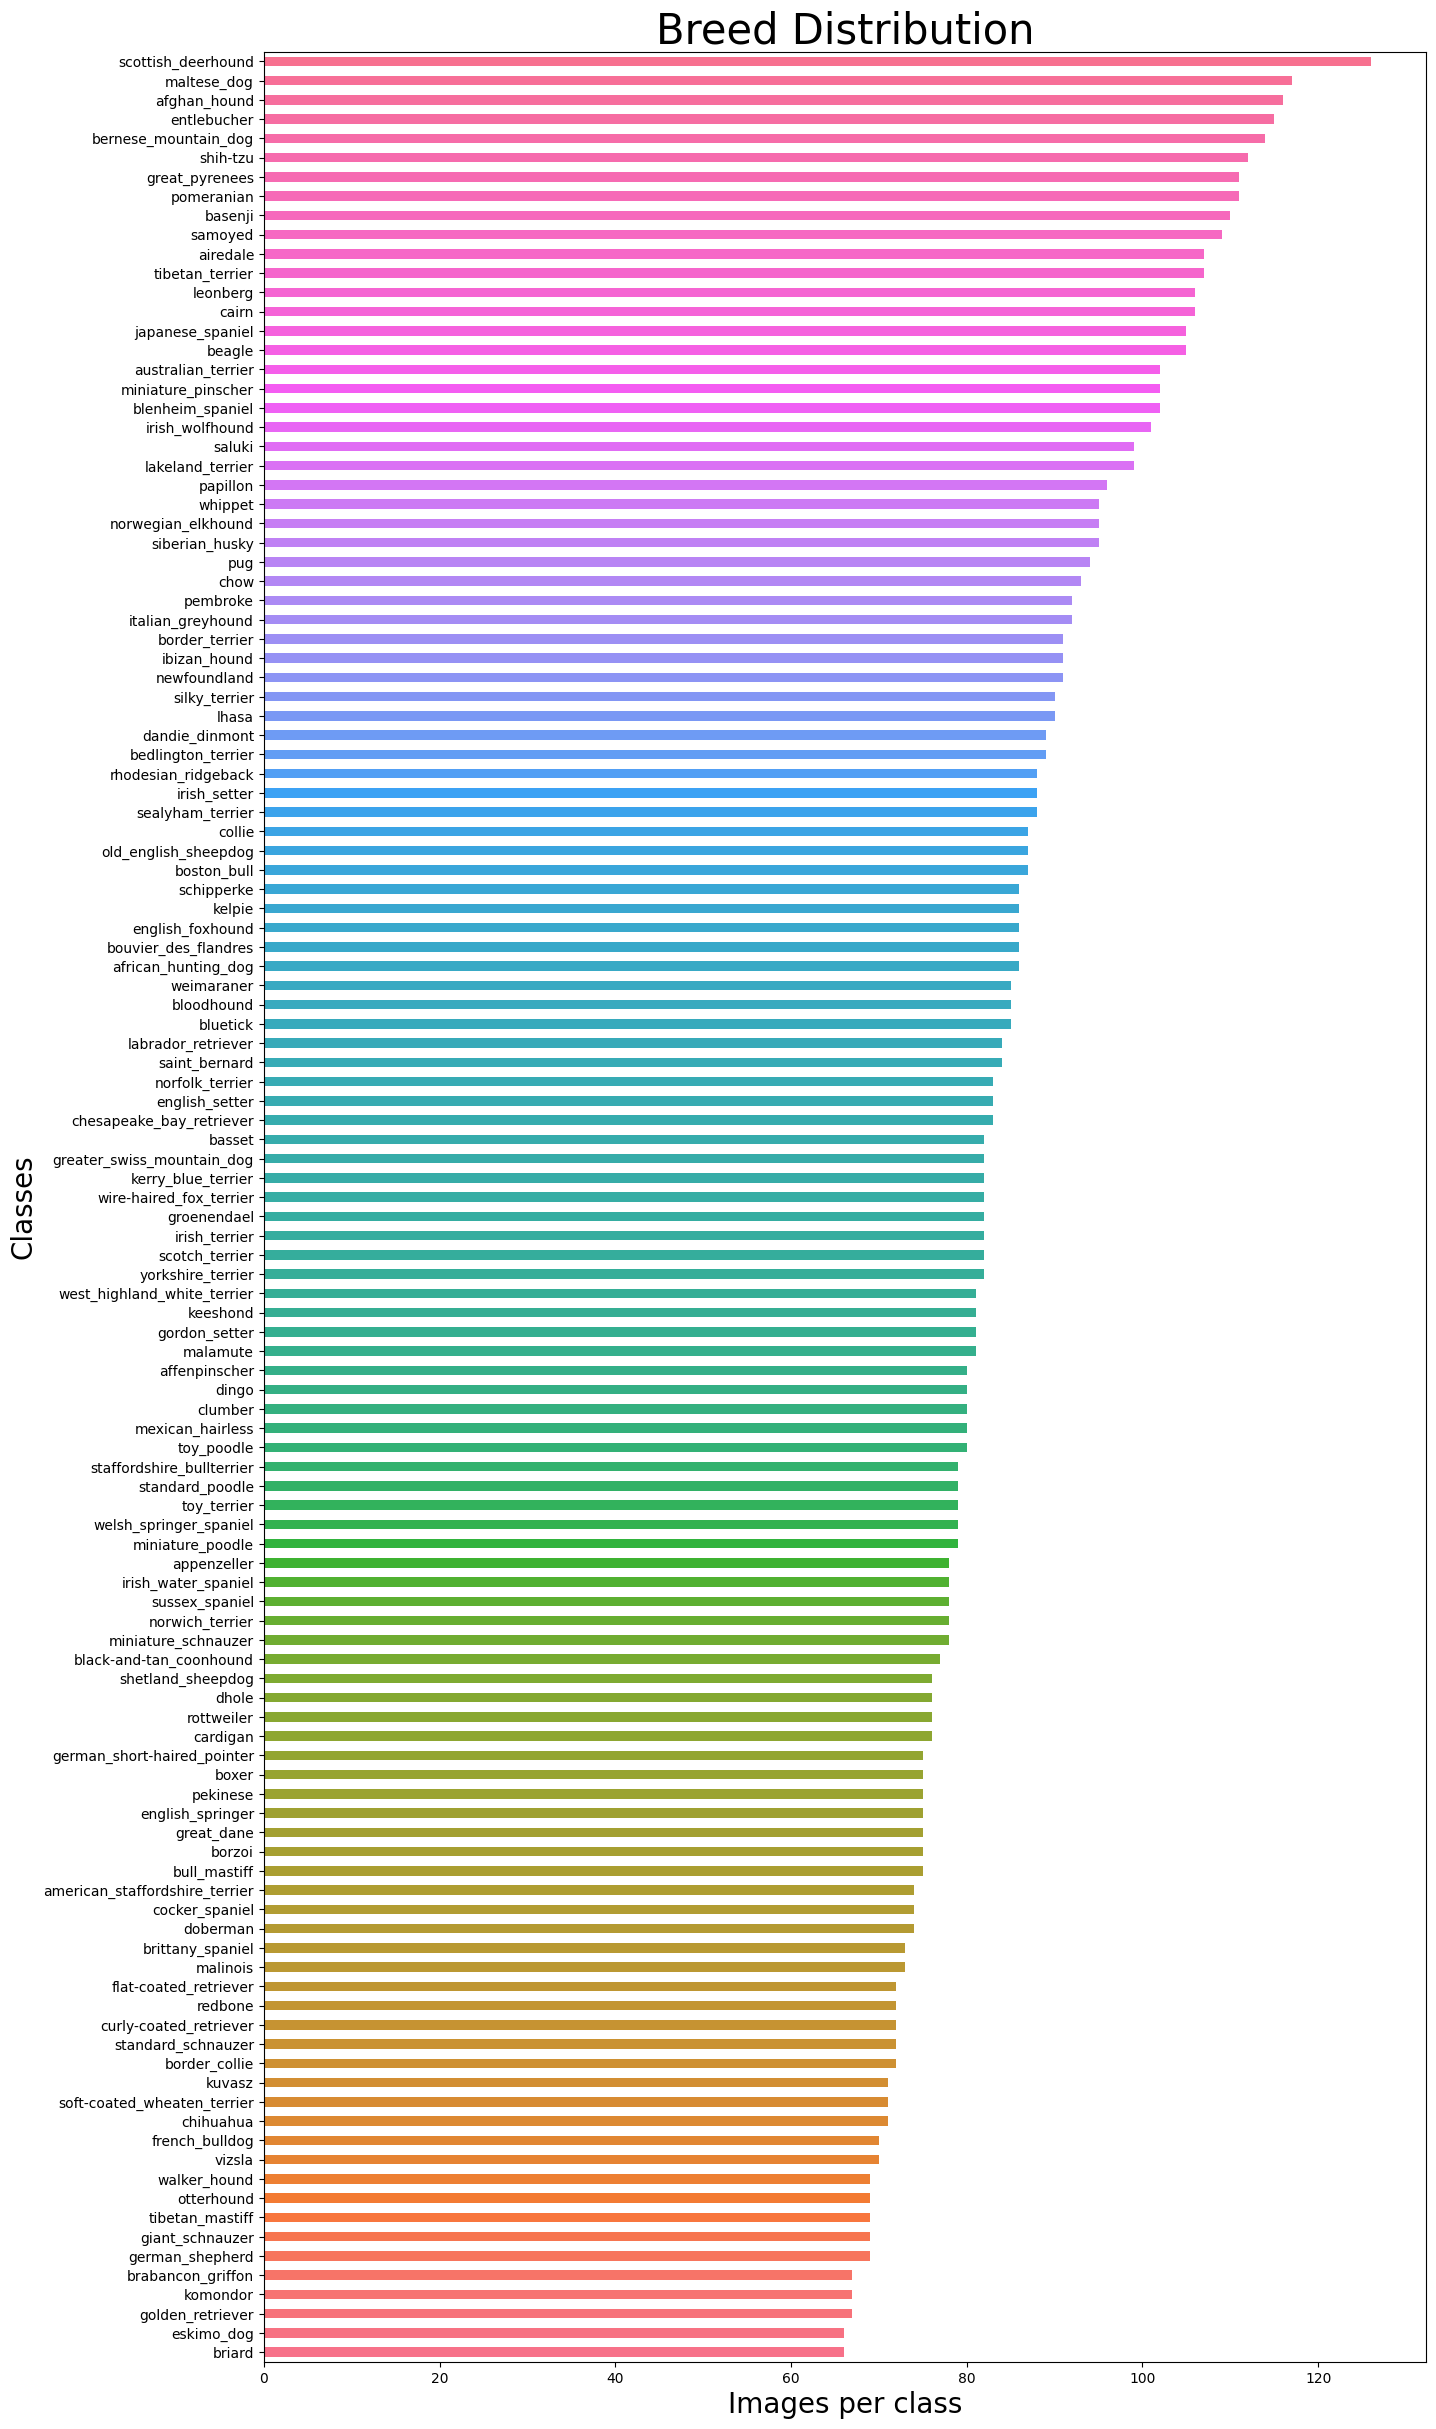

In [15]:
# Create class-specific color mappings
class_colors = sns.color_palette("husl", n_colors=len(breed_data['breed'].unique()))

# Take a look at the class/breed distribution
ax = pd.value_counts(breed_data['breed'], ascending=True).plot(kind='barh', fontsize="10", title="Breed Distribution", figsize=(15, 30), color=class_colors)
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)
plt.show()

2. Select representative varieties

In [98]:
#cluster20_list 20 breed
cluster20_list = ['giant_schnauzer', 'pug', 'rottweiler', 'brittany_spaniel', 'beagle', 'cocker_spaniel', 'greater_swiss_mountain_dog', 'clumber', 'newfoundland', 'siberian_husky', 'groenendael', 'kerry_blue_terrier', 'kelpie', 'yorkshire_terrier', 'lhasa', 'lakeland_terrier', 'schipperke', 'miniature_poodle']
cluster20_list

['giant_schnauzer',
 'pug',
 'rottweiler',
 'brittany_spaniel',
 'beagle',
 'cocker_spaniel',
 'greater_swiss_mountain_dog',
 'clumber',
 'newfoundland',
 'siberian_husky',
 'groenendael',
 'kerry_blue_terrier',
 'kelpie',
 'yorkshire_terrier',
 'lhasa',
 'lakeland_terrier',
 'schipperke',
 'miniature_poodle']

In [100]:
cluster20_breed=breed_data[breed_data.breed.isin(cluster20_list)]
cluster20_breed.shape # (column num, raw num)

(1525, 2)

In [101]:
#Number of different breed type
cluster20_breed.breed.value_counts()

breed
beagle                        105
lakeland_terrier               99
siberian_husky                 95
pug                            94
newfoundland                   91
lhasa                          90
schipperke                     86
kelpie                         86
groenendael                    82
greater_swiss_mountain_dog     82
yorkshire_terrier              82
kerry_blue_terrier             82
clumber                        80
miniature_poodle               79
rottweiler                     76
cocker_spaniel                 74
brittany_spaniel               73
giant_schnauzer                69
Name: count, dtype: int64

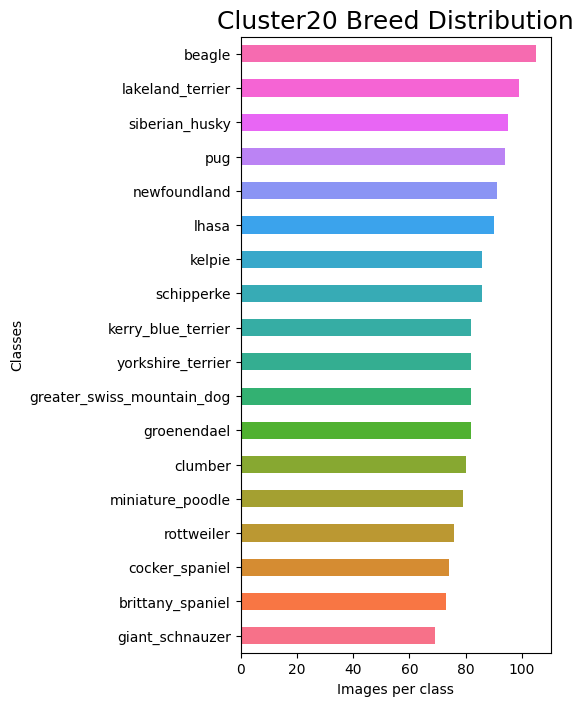

In [102]:
# Create class-specific color mappings
class_colors = sns.color_palette("husl", n_colors=len(cluster20_breed['breed'].unique()))

# Take a look at the class/breed distribution
ax = pd.value_counts(cluster20_breed['breed'], ascending=True).plot(kind='barh', fontsize="10", title="Cluster20 Breed Distribution", figsize=(4, 8), color=class_colors)
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.title.set_size(18)
plt.show()

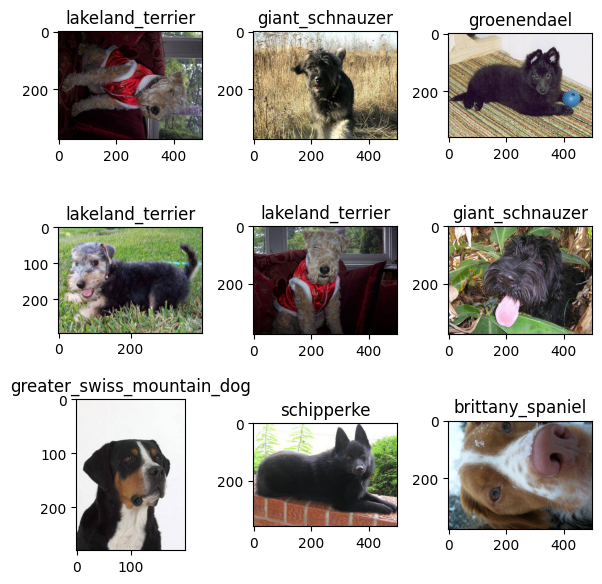

In [103]:
nrow=3
ncol=3
fig,ax=plt.subplots(nrow,ncol,figsize=(6,6))
for i,(img_id,breed) in enumerate(cluster20_breed[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train,img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    # ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

3. Data preprocessing

In [115]:
from sklearn.preprocessing import LabelEncoder
num_breed = 18
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [116]:
breed=list(cluster20_breed["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
cluster20_breed=cluster20_breed.query("breed in @new")
cluster20_breed

,id,breed,image_file
18,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier,007ff9a78eba2aebb558afea3a51c469.jpg
36,00fda6ecca54efbac26e907be4b0b78b,giant_schnauzer,00fda6ecca54efbac26e907be4b0b78b.jpg
39,010e87fdf252645a827e37470e65e842,groenendael,010e87fdf252645a827e37470e65e842.jpg
40,011761e3ae8ec5e188e8f0bcb59bb8b6,lakeland_terrier,011761e3ae8ec5e188e8f0bcb59bb8b6.jpg
47,013c43f40f0fb13fa25ac0c2a70fd48f,lakeland_terrier,013c43f40f0fb13fa25ac0c2a70fd48f.jpg
...,...,...,...
10157,fe4d298d682a42714f33085c9d241cc0,miniature_poodle,fe4d298d682a42714f33085c9d241cc0.jpg
10165,fe7ea4eb63ab5fddea120555790f9187,newfoundland,fe7ea4eb63ab5fddea120555790f9187.jpg
10170,feb16cf86c9dac6d476e3c372ba5c279,pug,feb16cf86c9dac6d476e3c372ba5c279.jpg
10176,fee98c990f4d69c6a8467dd0f0668440,greater_swiss_mountain_dog,fee98c990f4d69c6a8467dd0f0668440.jpg


In [117]:
# Create image_file row 
cluster20_breed['image_file'] = cluster20_breed['id'].apply(lambda x: x + ".jpg")
cluster20_breed.head()

,id,breed,image_file
18,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier,007ff9a78eba2aebb558afea3a51c469.jpg
36,00fda6ecca54efbac26e907be4b0b78b,giant_schnauzer,00fda6ecca54efbac26e907be4b0b78b.jpg
39,010e87fdf252645a827e37470e65e842,groenendael,010e87fdf252645a827e37470e65e842.jpg
40,011761e3ae8ec5e188e8f0bcb59bb8b6,lakeland_terrier,011761e3ae8ec5e188e8f0bcb59bb8b6.jpg
47,013c43f40f0fb13fa25ac0c2a70fd48f,lakeland_terrier,013c43f40f0fb13fa25ac0c2a70fd48f.jpg


In [118]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_data=np.zeros((len(cluster20_breed),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(cluster20_breed["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

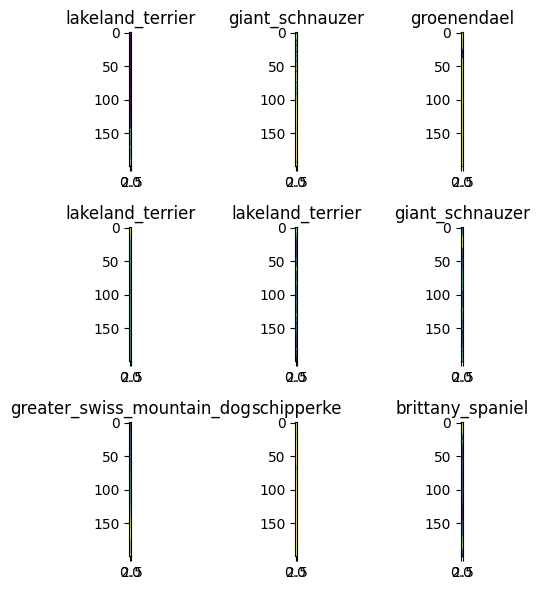

In [119]:
nrow = 3
ncol = 3
fig, ax = plt.subplots(nrow, ncol, figsize=(6, 6))

for i, (img_id, breed) in enumerate(cluster20_breed[["id", "breed"]].values[:nrow * ncol]):
    image_path = os.path.join(train, img_id + ".jpg")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    row = i // ncol
    col = i % ncol

    # 전처리된 이미지 가져오기
    preprocessed_image = train_data[i]

    # 전처리된 이미지 시각화
    ax[row, col].imshow(preprocessed_image[0])  # [0]은 배치 차원을 제거합니다.
    ax[row, col].set_title(breed)
    # ax[row, col].axis("off")  # 이미지에 대한 축을 표시하지 않도록 변경

plt.tight_layout()
plt.show()


In [121]:
train_data[i]

array([[[ 0.79607844,  0.9372549 ,  0.96862745],
        [ 0.81960785,  0.9607843 ,  0.99215686],
        [ 0.827451  ,  0.96862745,  1.        ],
        ...,
        [-0.92941177, -0.827451  , -0.7647059 ],
        [-0.7019608 , -0.56078434, -0.4588235 ],
        [-0.38039213, -0.21568626, -0.06666666]],

       [[ 0.79607844,  0.9372549 ,  0.96862745],
        [ 0.81960785,  0.96862745,  0.99215686],
        [ 0.827451  ,  0.96862745,  1.        ],
        ...,
        [-0.92156863, -0.8117647 , -0.7254902 ],
        [-0.8509804 , -0.70980394, -0.58431375],
        [-0.45098037, -0.2862745 , -0.1372549 ]],

       [[ 0.8039216 ,  0.94509804,  0.9764706 ],
        [ 0.827451  ,  0.96862745,  1.        ],
        [ 0.8352941 ,  0.9764706 ,  1.        ],
        ...,
        [-0.41176468, -0.2862745 , -0.16862744],
        [-0.5921569 , -0.45098037, -0.30196077],
        [-0.5058824 , -0.34117645, -0.17647058]],

       ...,

       [[-0.64705884, -0.54509807, -0.4823529 ],
        [-0

In [122]:
label_data = encoder.fit_transform(cluster20_breed["breed"].values)

4. Data split

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [62]:
print("************************************************************")
print("Train Data Shape :",x_train.shape)
print("************************************************************")
print("Test Data Shape :",x_test.shape)
print("************************************************************")
print("Train Label Data Shape :",y_train.shape)
print("************************************************************")
print("Test Label Data Shape :",y_test.shape)
print("************************************************************")

************************************************************
Train Data Shape : (1747, 200, 200, 3)
************************************************************
Test Data Shape : (437, 200, 200, 3)
************************************************************
Train Label Data Shape : (1747,)
************************************************************
Test Label Data Shape : (437,)
************************************************************


5. Data Augmentation(데이터 증강)

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# TensorFlow의 Keras API를 사용하여 이미지 데이터에 데이터 증강
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
# rotation_range: 무작위 회전 각도 범위 (0~45도).
# width_shift_range 및 height_shift_range: 무작위 수평 및 수직 이동 범위 (전체 너비 또는 높이에 대한 비율).
# shear_range: 무작위 전단 강도.
# zoom_range: 무작위 확대/축소 범위.
# horizontal_flip: 수평 뒤집기 여부.
# fill_mode: 회전 또는 이동 후 채울 픽셀의 전략 (가장 가까운 이웃, 상수 값, 또는 반사).

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [125]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# ResNet50V2 모델 로드
resnet = ResNet50V2(input_shape=[image_size, image_size, 3], weights='imagenet', include_top=False)

# ResNet50V2의 레이어를 학습되지 않도록 설정
for layer in resnet.layers:
    layer.trainable = False

# 모델의 출력 레이어를 가져옴
x = resnet.output

# BatchNormalization 레이어 추가
x = BatchNormalization()(x)

# GlobalAveragePooling2D 레이어 추가
x = GlobalAveragePooling2D()(x)

# Fully Connected 레이어 추가
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

# Dropout 레이어 추가
x = Dropout(0.2)(x)

# 출력 레이어 추가 (num_breed에 해당하는 클래스 수에 따라 softmax 활성화 함수 사용)
prediction = Dense(num_breed, activation='softmax')(x)

# 전체 모델 구성
model = Model(inputs=resnet.input, outputs=prediction)

# 옵티마이저 및 손실 함수 설정
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

# 모델 구조 출력
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

6. Model training

In [126]:
epochs_num = 10

history = model.fit(
    train_generator,  # 훈련 데이터 생성기
    steps_per_epoch=x_train.shape[0] // batch_size,  # 각 에포크당 반복할 스텝 수
    epochs=epochs_num,  # 전체 데이터셋을 통한 반복 횟수
    validation_data=test_generator,  # 검증 데이터 생성기
    validation_steps=x_test.shape[0] // batch_size  # 검증 데이터의 스텝 수
)

Epoch 1/10
38/38 [==============================] - 52s 1s/step - loss: 1.3452 - accuracy: 0.6195 - val_loss: 0.6926 - val_accuracy: 0.7674
Epoch 2/10
38/38 [==============================] - 47s 1s/step - loss: 0.6782 - accuracy: 0.7795 - val_loss: 0.4281 - val_accuracy: 0.8681
Epoch 3/10
38/38 [==============================] - 48s 1s/step - loss: 0.5060 - accuracy: 0.8493 - val_loss: 0.3887 - val_accuracy: 0.8611
Epoch 4/10
38/38 [==============================] - 50s 1s/step - loss: 0.4531 - accuracy: 0.8443 - val_loss: 0.4211 - val_accuracy: 0.8715
Epoch 5/10
38/38 [==============================] - 48s 1s/step - loss: 0.4258 - accuracy: 0.8603 - val_loss: 0.5396 - val_accuracy: 0.8438
Epoch 6/10
38/38 [==============================] - 51s 1s/step - loss: 0.3211 - accuracy: 0.9007 - val_loss: 0.4194 - val_accuracy: 0.8958
Epoch 7/10
38/38 [==============================] - 48s 1s/step - loss: 0.3370 - accuracy: 0.8973 - val_loss: 0.4395 - val_accuracy: 0.8576
Epoch 8/10
38/38 [==

In [149]:
print(f'Final Results after {epochs_num} Epochs:')
print(f'Training Loss: {history.history["loss"][-1]:.4f}, Validation Loss: {history.history["val_loss"][-1]:.4f}')
print(f'Training Accuracy: {history.history["accuracy"][-1]:.4f}, Validation Accuracy: {history.history["val_accuracy"][-1]:.4f}')

NameError: name 'epochs_num' is not defined

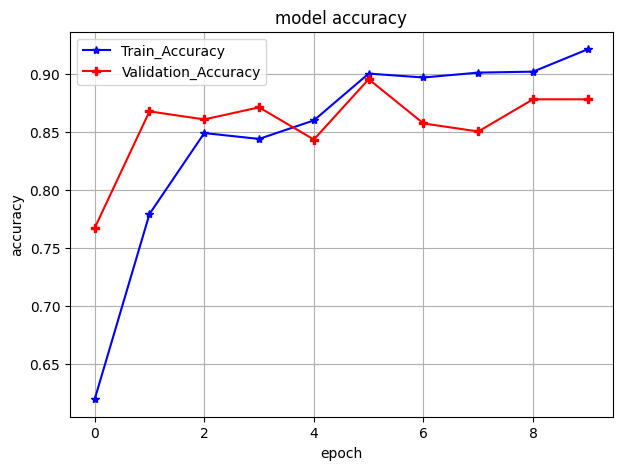

In [130]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

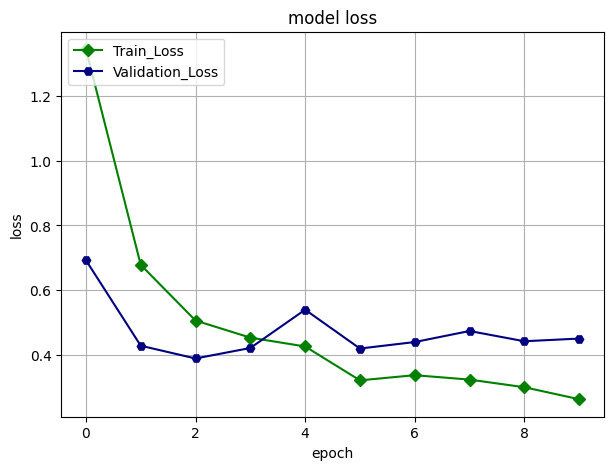

In [131]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [150]:
lab = df2["breed"].unique().tolist()
print(lab)

['lakeland_terrier', 'giant_schnauzer', 'groenendael', 'greater_swiss_mountain_dog', 'schipperke', 'brittany_spaniel', 'kelpie', 'pug', 'lhasa', 'clumber', 'siberian_husky', 'newfoundland', 'beagle', 'kerry_blue_terrier', 'miniature_poodle', 'yorkshire_terrier', 'cocker_spaniel', 'rottweiler']


10/10 [==============================] - 11s 979ms/step


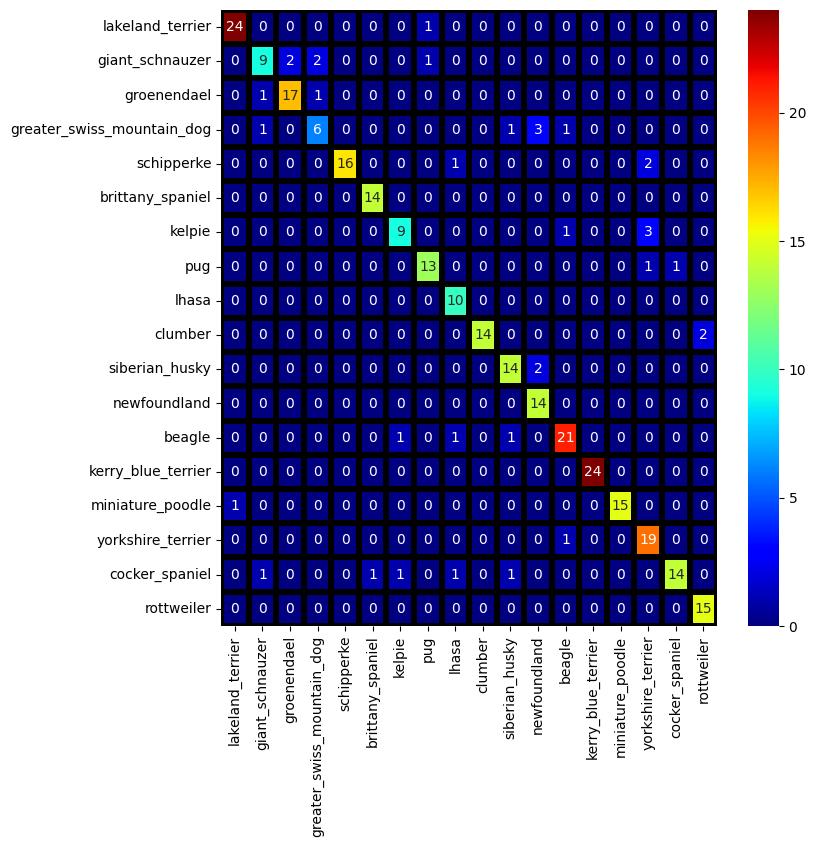

In [133]:
from sklearn.metrics import confusion_matrix, classification_report

pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

plt.figure(figsize=(8,8))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="jet",lw=4,linecolor="black",xticklabels=lab,yticklabels=lab)
plt.show()

In [134]:
print(classification_report(y_test,predict,target_names=lab))

                            precision    recall  f1-score   support

          lakeland_terrier       0.96      0.96      0.96        25
           giant_schnauzer       0.75      0.64      0.69        14
               groenendael       0.89      0.89      0.89        19
greater_swiss_mountain_dog       0.67      0.50      0.57        12
                schipperke       1.00      0.84      0.91        19
          brittany_spaniel       0.93      1.00      0.97        14
                    kelpie       0.82      0.69      0.75        13
                       pug       0.87      0.87      0.87        15
                     lhasa       0.77      1.00      0.87        10
                   clumber       1.00      0.88      0.93        16
            siberian_husky       0.82      0.88      0.85        16
              newfoundland       0.74      1.00      0.85        14
                    beagle       0.88      0.88      0.88        24
        kerry_blue_terrier       1.00      1.00

10/10 [==============================] - 10s 1s/step


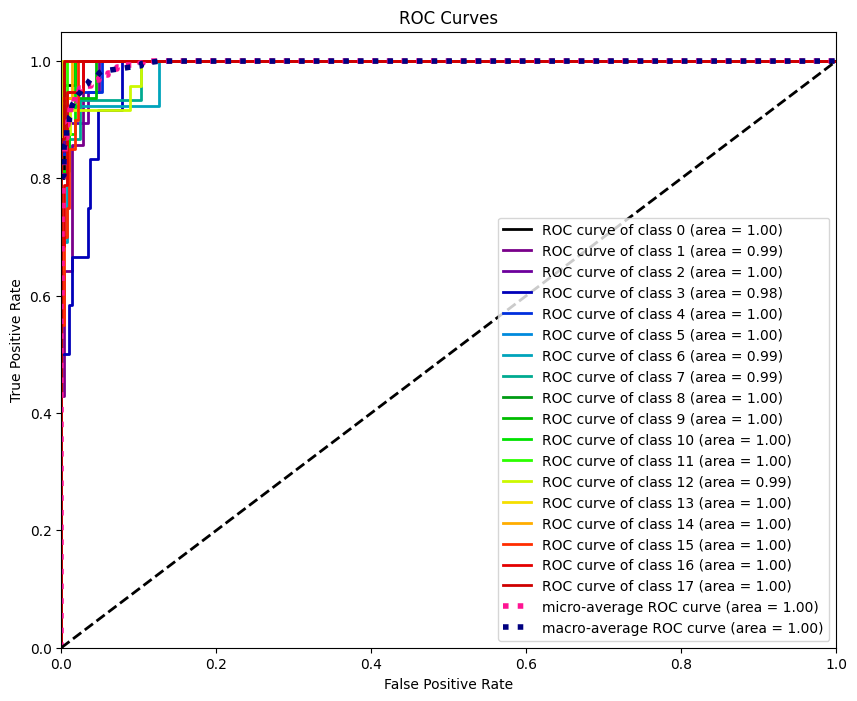

In [135]:
import scikitplot as skplt

# 예측값 계산
pred = model.predict(x_test)

# ROC 곡선 시각화
fig, ax = plt.subplots(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, pred, ax=ax)

plt.show()


10/10 [==============================] - 10s 977ms/step


<Figure size 2000x1500 with 0 Axes>

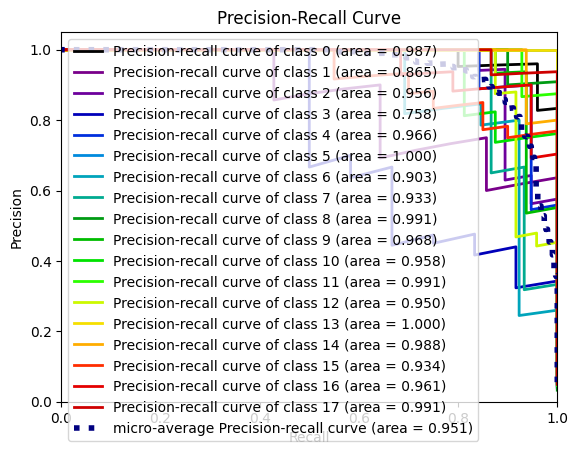

In [136]:
# 예측값 계산
pre = model.predict(x_test)

# Precision-Recall 곡선 시각화
plt.figure(figsize=(20, 15))
skplt.metrics.plot_precision_recall(y_test, pre)

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

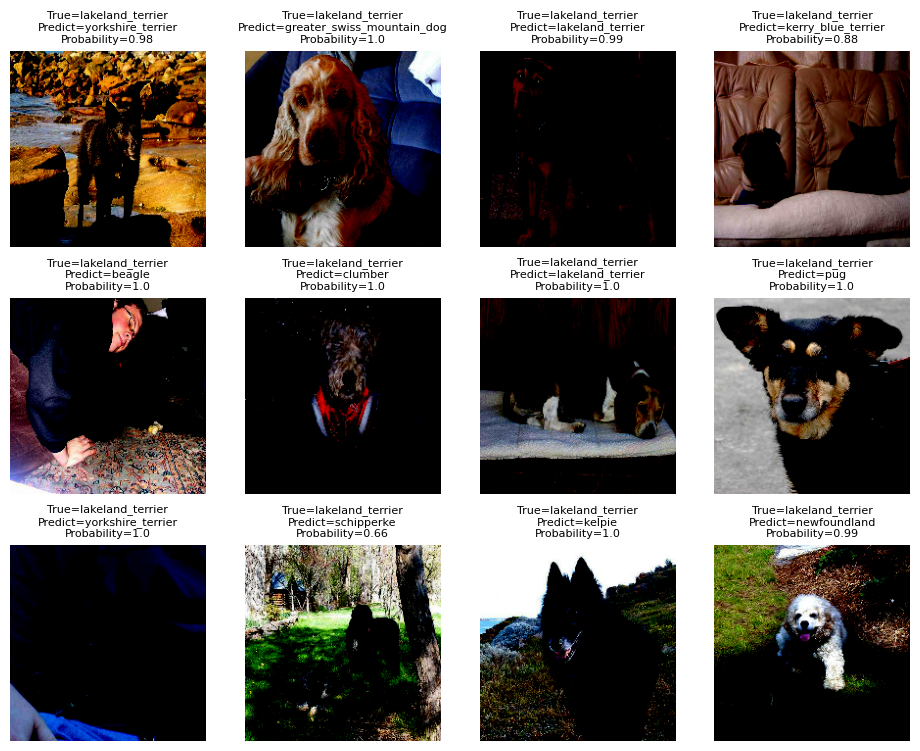

In [137]:
row = 3
column = 4

fig, ax = plt.subplots(row, column)
fig.set_size_inches(9, 7)

index = 0
for m in range(0, row):
    for n in range(0, column):
        true_data = np.argmax(y_test[index])  # Get the true class label
        pred_data = predict[index]  # Get the predicted class label
        probability = round(pre[index][pred_data], 2)
         
        font_size = 8  # Adjusting font size
        ax[m][n].set_title("True=" + str(lab[true_data]) + "\nPredict=" + str(lab[pred_data]) + "\nProbability=" + str(probability),
                           fontsize=font_size)
        
        ax[m][n].axis("off")
        ax[m][n].imshow(x_test[index])
        index += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)
plt.show()


1/1 [==============================] - 1s 688ms/step


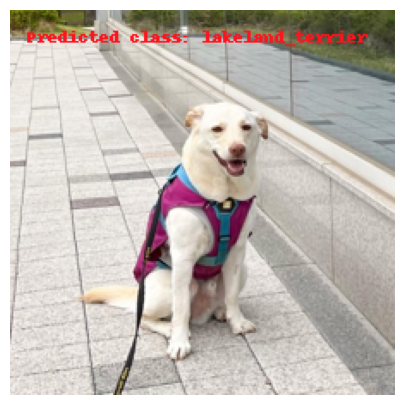

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf

# Local path to the image
sample_data = "./dog_data/dog_sample.jpg"

# Load the image from the local path
image_path = Image.open(sample_data)
image_resized_rgb = image_path.resize((224, 224)).convert('RGB')
image_array_rgb = np.array(image_resized_rgb)
image_scale_rgb = image_array_rgb.astype("float32") / 255.0
image_reshape_rgb = image_scale_rgb.reshape(1, 224, 224, 3)  

# Assuming 'model' and 'lab' are already defined
final_pred = model.predict(image_reshape_rgb)[0]
max_prob = np.argmax(final_pred)
results = lab  
my_predict = results[max_prob]

# Using the default font since loading external fonts can be platform-dependent
myFont = ImageFont.load_default()

image_draw = ImageDraw.Draw(image_resized_rgb)
image_draw.text((10, 10), f"Predicted class: {my_predict}", font=myFont, fill=(255, 20, 30))
# image_resized_rgb.save("my_image.png")

plt.figure(figsize=(5, 5))
plt.imshow(image_resized_rgb)
plt.axis("off")
plt.show()
